In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import sys
sys.path.append('../scripts/')
import cv2
import matplotlib.patches as patches
import math
import scipy
from scipy.ndimage.morphology import binary_closing
from scipy import ndimage

In [2]:
from icon_helper_functions import image_splitter
from icon_helper_functions import show

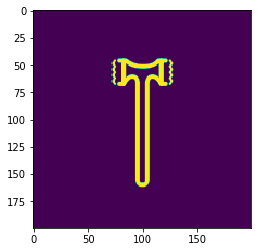

In [15]:
# impath = '../data/Icons_clean/bricklayer_hammer/bricklayer%20hammer_1057329.jpg'
impath = '../data/Icons_previous/bricklayer_hammer/bricklayer%20hammer_1036668.jpg'
im = Image.open(impath)
imcv = cv2.imread(impath,-1)[:,:,3]

plt.imshow(imcv)
plt.show()

In [16]:
def fill_im(imcv):
    closed = ndimage.binary_closing(imcv).astype(float)
    return ndimage.binary_fill_holes(closed).astype(float)

In [17]:
edges = cv2.Canny(imcv,100,200)

In [18]:
dst = cv2.cornerHarris(imcv,2,3,0.04)

In [19]:
dst[dst>0.00001*dst.max()]=255
dst[dst<=0.00001*dst.max()]=0


In [20]:
def pil_to_cv(pil_image):
    open_cv_image = np.array(pil_image) 
    # Convert RGB to BGR 
    open_cv_image = open_cv_image[:, :, ::-1].copy() 
    return open_cv_image

In [21]:
# imcv = cv2.imread(impath,-1)[:,:,3]
# filled_im = fill_im(imcv)
# cv2_im = cv2.cvtColor(filled_im,cv2.COLOR_BGR2RGB)
# im = Image.fromarray(cv2_im)
# data = np.array(im)
# dat = data[:,:,1]

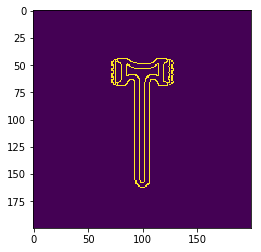

In [22]:
plt.imshow(edges)
plt.show()

In [39]:
ims = image_splitter(impath,filled=True)

In [40]:
PART = ims[1]

In [41]:
# filled_part = fill_im(imcv)

# filled_part.shape

# plt.imshow(filled_part)
# plt.show()

# im = Image.fromarray(np.uint8(filled_part * 255),'L')

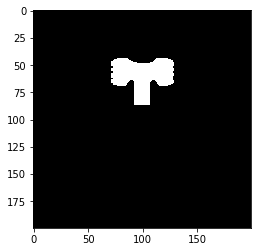

In [42]:
plt.imshow(PART)
plt.show()

In [43]:
# len(ims)

In [44]:
# im2 = image_splitter(ims[2])

In [45]:
# plt.imshow(ims[1])
# plt.show()

In [46]:
# def pil_to_cv(pil_image):
#     open_cv_image = np.array(pil_image) 
#     # Convert RGB to BGR 
#     open_cv_image = open_cv_image[:, :, ::-1].copy() 
#     return open_cv_image

In [47]:
# plt.imshow(fill_im(pil_to_cv(ims[1])))
# plt.show()

In [48]:
# part_1 = fill_im(pil_to_cv(ims[1]))

In [49]:
# type(pil_to_cv(ims[1]))

In [50]:
# type(imcv)

In [51]:
# np.min(part_1)

In [52]:
def plot_primitive(im_part):
    open_cv_image = np.array(im_part) 
    open_cv_image = open_cv_image[:, :, ::-1].copy() 
    edged = cv2.Canny(open_cv_image, 30, 200)
    _, contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    rects = [cv2.boundingRect(cnt) for cnt in contours]
    rects = sorted(rects,key=lambda  x:x[1],reverse=True)

    shapes = []
    apps = []
#     print(len(contours))
    if len(contours) < 1:
        print('No contours')
        return -1
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt,0.05*cv2.arcLength(cnt,True),True)
        if len(approx)==3:
#             print(approx)
#             print('triangle')
            shapes.append('triange')
            apps.append(approx)
        elif len(approx)==4:
#             print(approx)
#             print('4 sided')
            shapes.append('4 sided')
            apps.append(approx)
        else:
#             print(len(approx))
            shapes.append('none')
            apps.append(approx)
#             print('none')
    
    max_area = 0
    for ct in range(len(rects)):
        rect = rects[ct]
        area = rect[2]*rect[3]
        if area > max_area:
            max_area = area
            pos = ct
#     print(pos)
#     print(len(apps))
#     print(apps[pos])
    dummy_img = open_cv_image*0
    clean_plot = cv2.drawContours(dummy_img,apps,pos,(0,255,0),4)
    print(shapes[pos])
    plt.imshow(clean_plot)
    plt.show()
    return apps,pos,rects,hierarchy

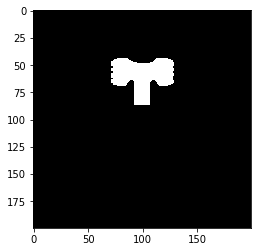

In [53]:
plt.imshow(PART)
plt.show()

none


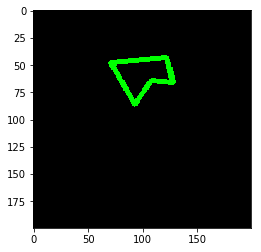

In [54]:
all_shapes,pos,rects,hierarchy = plot_primitive(PART)
best_shape = all_shapes[pos]

In [55]:
check_

NameError: name 'check_' is not defined

In [56]:
clean = []
for i in range(len(all_shapes)):
    for j in range(len(all_shapes)):
        rec1 = all_shapes[i]
        rec2 = all_shapes[j]
        check = check_similarity(rec1,rec2)
        if check == True:
            clean.append(i)
            clean.append(j)
clean = list(set(clean))

NameError: name 'check_similarity' is not defined

In [57]:
all_shapes[1][0][0]

array([71, 48], dtype=int32)

In [58]:
rects[0]

(71, 43, 58, 44)

In [59]:
rects[1]

(71, 43, 58, 44)

In [60]:
def check_similarity(rec1,rec2):
    x_min_1 = rec1[0]
    x_max_1 = x_min_1 + rec1[2]
    y_min_1 = rec1[1]
    y_max_1 = y_min_1 + rec1[3]
    
    x_min_2 = rec2[0]
    x_max_2 = x_min_2 + rec2[2]
    y_min_2 = rec2[1]
    y_max_2 = y_min_2 + rec2[3]
    
    overlap_ratio = ((min(x_max_1,x_max_2) - max(x_min_1,x_min_2)) * (min(y_max_1,y_max_2) - max(y_min_1,y_min_2)))/max(rec1[2]*rec1[3],rec2[2]*rec2[3])
    if overlap_ratio > 0.85:
#         print(overlap_ratio)
        return True
    else:
        return False
#     a1 = 1
#     a2 = 2
#     xs = []
#     if len(rec1) != len(rec2):
#         return False
#     for i in range(len(rec1)): 
#         x1,y1 = rec1[0][0][0],rec1[0][0][1]
#         x2,y2 = rec2[0][0][0],rec2[0][0][1]
        
#         if abs((x1-x2)/x2) > 0.1 and abs((x1-x2)/x1) > 0.1:
#             return False
#         if abs((y1-y2)/y2) > 0.1 and abs((y1-y2)/y1) > 0.1:
#             return False
#     return True

In [61]:
# # DEBUG CODE BELOW
# check_similarity(rects[0],rects[1])

# rec1 = rects[0]
# rec2 = rects[1]

# x_min_1 = rec1[0]
# x_max_1 = x_min_1 + rec1[2]
# y_min_1 = rec1[1]
# y_max_1 = y_min_1 + rec1[3]

# x_min_2 = rec2[0]
# x_max_2 = x_min_2 + rec1[2]
# y_min_2 = rec1[2]
# y_max_2 = y_min_2 + rec1[3]



# (min(x_max_1,x_max_2) - max(x_min_1,x_min_2)) * ((min(y_max_1,y_max_2)) - max(y_min_1,y_min_2))

# (min(y_max_1,y_max_2))

# max(y_min_1,y_min_2)

# y_min_1,y_min_2

# max(x_min_1,x_min_2)

# x_min_1,x_max_2,y_min_1,y_max_1

# check_similarity(rec1,rec2)

In [62]:
ct = 0
similar_pairs = []
for i in range(len(all_shapes)):
    for j in range(i):
        if check_similarity(rects[i],rects[j]):
            similar_pairs.append((i,j))
            similar_pairs.append((j,i))

In [63]:
clean_set = []
for i in range(len(all_shapes)):
    if i == 0:
        clean_set.append(i)
    else:
        allowed = True
        for j in clean_set:
            if (j,i) in similar_pairs:
                allowed = False
        if allowed:
            clean_set.append(i)

In [64]:
clean_set

[0]

In [65]:
for pos in clean_set:
    dummy_img = open_cv_image*0
    clean_plot = cv2.drawContours(dummy_img,all_shapes,pos,(0,255,0),4)
    plt.imshow(clean_plot)
    plt.show()

NameError: name 'open_cv_image' is not defined

In [66]:
best_shape = all_shapes[6]

IndexError: list index out of range

In [67]:
# y1,x1 = best_shape[0][0][0],best_shape[0][0][1]
# y2,x2 = best_shape[1][0][0],best_shape[1][0][1]
# y3,x3 = best_shape[2][0][0],best_shape[2][0][1]
# y4,x4 = best_shape[3][0][0],best_shape[3][0][1]

# def dist(x1,y1,x2,y2):
#     return ((y2-y1)**2 + (x2-x1)**2)**0.5

# distances = [dist(x1,y1,x2,y2),dist(x1,y1,x3,y3),dist(x1,y1,x4,y4)]
# a,b = np.sort(np.asarray(distances))[:2]
# height = max(a,b)
# width = min(a,b)

# slope = (y4-y1)/(x4-x1)

# angle = math.degrees(math.atan(slope))



In [68]:
coordinates = ''
ct = 0
for point in best_shape:
    if ct > 0:
        coordinates += ' '
    x,y = point[0][0],point[0][1]
    coordinates += '%s,%s'%(x,y)
    ct += 1

In [69]:
# coordinates

In [70]:
# coordinates = '134,103 105,16 121,125 98,2 75,87 102,2 107,122 104,15 82,83'

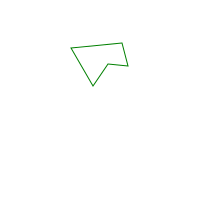

In [71]:
svg_str = '<svg width="200" height="200" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">'

# element = '<rect x="%s" y="%s" height="%s" width="%s" style="stroke:green; fill: white" transform="rotate(%s %s %s)"></rect>'%(x1,y1,width,height,angle,x1,y1)
element = '<polygon points="%s" style="stroke:green; fill: white"/>'%coordinates
svg_content = svg_str + '\n' + element + '</svg>'

f = open('trial.svg','w')
print(svg_content,file = f)
f.close()

from IPython.display import SVG 
SVG(filename='trial.svg')

# Exploring texture from fav-icon

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def pil_to_cv(pil_image):
    im_no_alpha = Image.new("RGB", pil_image.size, (255, 255, 255))
    im_no_alpha.paste(pil_image, mask=pil_image.split()[3]) # 3 is the alpha channel
    imcv = np.array(im_no_alpha)
    return imcv

In [73]:
impath = '../data/Flat_icon/hammer/222586.png'
# im = Image.open(impath)
# imcv = pil_to_cv(im)

In [74]:
def find_histogram(clt):
    """
    create a histogram with k clusters
    :param: clt
    :return:hist
    """
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()

    return hist
def plot_colors2(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

In [75]:
def dominant_colors(impath_texture):
    im = Image.open(impath_texture)
    img = pil_to_cv(im)
    img_r = img.reshape((img.shape[0] * img.shape[1],3)) #represent as row*column,channel number
    clt = KMeans(n_clusters=5) #cluster number
    clt.fit(img_r)

    colors = clt.cluster_centers_

    bad = []
    for i in range(len(colors)):
        color = colors[i]
        if color[0] > 245 and color[1] > 245 and color[2] > 245:
            bad.append(i)
        elif color[0] < 35 and color[1] < 35 and color[2] < 35:
            bad.append(i)
    
    hist = find_histogram(clt)
    colors = clt.cluster_centers_

    bad = []
    for i in range(len(colors)):
        color = colors[i]
        if color[0] > 245 and color[1] > 245 and color[2] > 245:
            bad.append(i)
        elif color[0] < 35 and color[1] > 35 and color[2] > 5:
            bad.append(i)
    hist_new = []
    colors_new = []

    hist_sum = 0
    for i in range(len(hist)):
        if i not in bad:
            hist_new.append(hist[i])
            hist_sum += hist[i]
    hist_new = [h/hist_sum for h in hist_new]
    for i in range(len(colors)):
        if i not in bad:
            colors_new.append(colors[i])
    bar = plot_colors2(hist_new, colors_new)

In [76]:
dominant_colors(impath)

In [77]:
img = imcv
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_r = img.reshape((img.shape[0] * img.shape[1],3)) #represent as row*column,channel number
clt = KMeans(n_clusters=5) #cluster number
clt.fit(img_r)

hist = find_histogram(clt)
colors = clt.cluster_centers_

bad = []
for i in range(len(colors)):
    color = colors[i]
    if color[0] > 245 and color[1] > 245 and color[2] > 245:
        bad.append(i)
    elif color[0] < 35 and color[1] > 35 and color[2] > 5:
        bad.append(i)
hist_new = []
colors_new = []

hist_sum = 0
for i in range(len(hist)):
    if i not in bad:
        hist_new.append(hist[i])
        hist_sum += hist[i]
hist_new = [h/hist_sum for h in hist_new]
for i in range(len(colors)):
    if i not in bad:
        colors_new.append(colors[i])
bar = plot_colors2(hist_new, colors_new)

ValueError: cannot reshape array of size 40000 into shape (40000,3)

In [25]:
bar = plot_colors2(hist_new, colors_new)

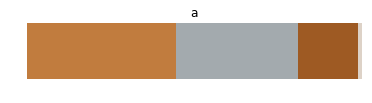

In [26]:
show(bar,'a')

In [23]:
hist_new

[0.110870361328125,
 0.091724395751953125,
 0.04421234130859375,
 0.0027008056640625]

In [191]:
colors_new

[array([ 193.01720341,  124.173376  ,   62.32655519]),
 array([ 163.38581826,  170.11540861,  174.88122271]),
 array([ 158.63943054,   90.62312338,   35.47929249]),
 array([ 222.11440678,  210.95762712,  200.63559322])]

# Exploring actual images

In [43]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from matplotlib import cm
from scipy import ndimage
import sys
import scipy
from scipy.ndimage.morphology import binary_closing
import cv2
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import PIL
from skimage import util

In [113]:
img_path = '../outputs/actual_images/newImage.png'
# img_path = '../data/Icons_clean/bricklayer_hammer/bricklayer%20hammer_1016437.jpg'
output_path = False
actual = True
filled = False

In [114]:
if type(img_path) == Image.Image:
    im = img_path

else:
    im = Image.open(img_path).convert('LA').resize((200,200))

if filled == True:
    imcv = cv2.imread(img_path,-1)[:,:,3]
    filled_im = fill_im(imcv)
    # cv2_im = cv2.cvtColor(cv_im,cv2.COLOR_BGR2RGB)
    im = Image.fromarray(np.uint8(filled_im * 255),'L')
    data = np.array(im)
    # dat = data[:,:,1]
    dat = data
else:
    if actual == True:
        data = np.array(im)
        dat_ = data[:,:,0]
        dat = util.invert(dat_)
    else:
        data = np.array(im)
        dat = data[:,:,1]

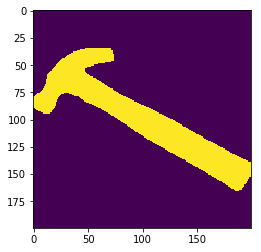

In [115]:
plt.imshow(dat)
plt.show()

In [116]:
dat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [117]:
#Convert into binary image
for i in range(200):
    for j in range(200):
        if dat[i][j]>0:
            dat[i][j] = 1

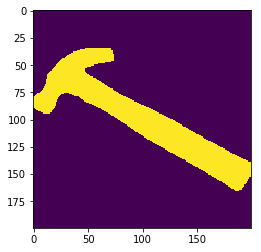

In [118]:
plt.imshow(dat)
plt.show()

In [119]:
# Measure total nonzero points
point_ct = 0
for i in range(200):
    for j in range(200):
        if dat[i][j]>0:
            point_ct += 1
print(point_ct)

6284


In [120]:
# Store non zero point locations into numpy array
points = np.zeros((point_ct,2))
point_ct = 0
for i in range(200):
    for j in range(200):
        if dat[i][j]>0:
            points[point_ct][0] = j
            points[point_ct][1] = i
            point_ct += 1

y,x = points[:,0],points[:,1]
scale_size = max(y) - min(y)
print(scale_size)
print(y,x)

199.0
[ 48.  49.  50. ... 186. 187. 188.] [ 35.  35.  35. ... 165. 165. 165.]


In [121]:
# Normalize coordinates and calculate eigenvectors of covariance matrix

x = x - np.mean(x)
y = y - np.mean(y)
coords = np.vstack([x, y])
cov = np.cov(coords)
evals, evecs = np.linalg.eig(cov)
print(evals,evecs)

[ 175.71151315 4123.07952106] [[-0.87110102 -0.49110387]
 [ 0.49110387 -0.87110102]]


In [122]:
# Get principal components using eigenvalues
sort_indices = np.argsort(evals)[::-1]
evec1, evec2 = evecs[:, sort_indices]
x_v1, y_v1 = evec1  # Eigenvector with largest eigenvalue
x_v2, y_v2 = evec2

# Get slopes of the two principal axes
slope = y_v1/x_v1
m1 = slope
m2 = -1/m1

# Get center of mass of image
blobs = dat > 0
labels, nlabels = ndimage.label(blobs)
# find the center of mass of each label
t = ndimage.center_of_mass(dat, labels, np.arange(nlabels) + 1 )
# calc sum of each label, this gives the number of pixels belonging to the blob
s = ndimage.sum(blobs, labels,  np.arange(nlabels) + 1 )
# notation of output (y,x)
cty,ctx = t[s.argmax()]

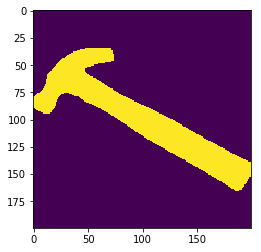

In [123]:
plt.imshow(blobs)
plt.show()

In [124]:
# Split image based on axis
data_total = np.array(im)
if len(data_total.shape) > 2:
    img_data = util.invert(data_total[:,:,0])
else:
    img_data = data_total
# imdat = Image.fromarray(img_data)

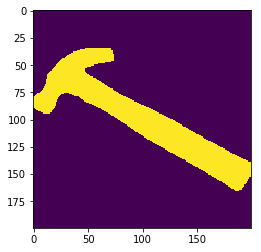

In [125]:
plt.imshow(img_data)
plt.show()

In [126]:
dat1 = np.zeros((200,200))
dat2 = np.zeros((200,200))
dat3 = np.zeros((200,200))
dat4 = np.zeros((200,200))
# dataa = img
for i in range(200):
    for j in range(200):
        y = i
        x = j
        val = img_data[i][j]
        eqn1 = y+m1*ctx-m1*x-cty
        eqn2 = y+m2*ctx-m2*x-cty
        if eqn1 > 0:
            dat1[i][j] = val
        else:
            dat2[i][j] = val

        if eqn2 > 0:
            dat3[i][j] = val
        else:
            dat4[i][j] = val


# In[156]:


im1 = Image.fromarray(dat1)
im2 = Image.fromarray(dat2)
im3 = Image.fromarray(dat3)
im4 = Image.fromarray(dat4)

if im1.mode != 'RGB':
    im1 = im1.convert('RGB')
if im2.mode != 'RGB':
    im2 = im2.convert('RGB')
if im3.mode != 'RGB':
    im3 = im3.convert('RGB')
if im4.mode != 'RGB':
    im4 = im4.convert('RGB')

sum1 = sum(sum(dat1))
sum2 = sum(sum(dat2))
sum3 = sum(sum(dat3))
sum4 = sum(sum(dat4))
diff1 = abs(sum1-sum2)
diff2 = abs(sum3-sum4)

if diff2 < diff1:
    axis = 1
    part_1 = im1
    part_2 = im2
else:
    axis = 2
    part_1 = im3
    part_2 = im4

for im_m in [im1,im2,im3,im4]:
    if im_m.mode != 'RGB':
        im_m = im_m.convert('RGB')

dat5 = np.zeros((200,200))
dat6 = np.zeros((200,200))
dat7 = np.zeros((200,200))
dat8 = np.zeros((200,200))
dat9 = np.zeros((200,200))
dat10 = np.zeros((200,200))

if axis == 1:
    slope_correct = m1
    slope_other = m2
else:
    slope_correct = m2
    slope_other = m1
# dataa = img
for i in range(200):
    for j in range(200):
        y = i
        x = j
        val = img_data[i][j]
        A = scale_size/10
        B = scale_size/5
        C = -scale_size/10
        eqn3 = y+slope_correct*(ctx+A)-slope_correct*x-(cty+slope_other*A)
        eqn4 = y+slope_correct*(ctx+B)-slope_correct*x-(cty+slope_other*B)
        eqn5 = y+slope_correct*(ctx+C)-slope_correct*x-(cty+slope_other*C)

        if eqn3 > 0:
            dat5[i][j] = val
        else:
            dat6[i][j] = val

        if eqn4 > 0:
            dat7[i][j] = val
        else:
            dat8[i][j] = val

        if eqn5 > 0:
            dat9[i][j] = val
        else:
            dat10[i][j] = val

part_5 = Image.fromarray(dat5).convert('RGB')
part_6 = Image.fromarray(dat6).convert('RGB')
part_7 = Image.fromarray(dat7).convert('RGB')
part_8 = Image.fromarray(dat8).convert('RGB')
part_9 = Image.fromarray(dat9).convert('RGB')
part_10 = Image.fromarray(dat10).convert('RGB')

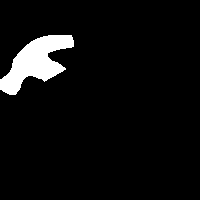

In [143]:
part_10